In [22]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/81/d7/d2537d51efb692d0c411e64267ba349e7668d40f5bc73cefe78ccd650dcd/scipy-1.11.3-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 533.7 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.wh

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import os
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras import Sequential,regularizers
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import image_dataset_from_directory

from zipfile import ZipFile
import random as rn


In [2]:
zip = ZipFile(r"E:\Ditsa DS\dataset for project\hgr.zip")
zip.extractall(r"E:\Ditsa DS\dataset for project\hand_gesture_recognition_data\leapGestRecog")
zip.close()

In [3]:
np.random.seed(30)
tf.random.set_seed(30)

In [4]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('E:/Ditsa DS/dataset for project/hand_gesture_recognition_data/leapGestRecog/00/'):
    if not j.startswith('.'):
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

{'01_palm': 0,
 '02_l': 1,
 '03_fist': 2,
 '04_fist_moved': 3,
 '05_thumb': 4,
 '06_index': 5,
 '07_ok': 6,
 '08_palm_moved': 7,
 '09_c': 8,
 '10_down': 9}

In [5]:
x_data = []
y_data = []
IMG_SIZE = 256
datacount = 0

In [6]:
for i in range(0, 10):
    for j in os.listdir('E:/Ditsa DS/dataset for project/hand_gesture_recognition_data/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'):
            count = 0
            for k in os.listdir('E:/Ditsa DS/dataset for project/hand_gesture_recognition_data/leapGestRecog/0' +
                                str(i) + '/' + j + '/'):

                path = 'E:/Ditsa DS/dataset for project/hand_gesture_recognition_data/leapGestRecog/0' + str(i) + '/' + j + '/' + k
                img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
                arr = np.array(img)
                x_data.append(arr)
                count = count + 1
            y_values = np.full((count, 1), lookup[j])
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1)

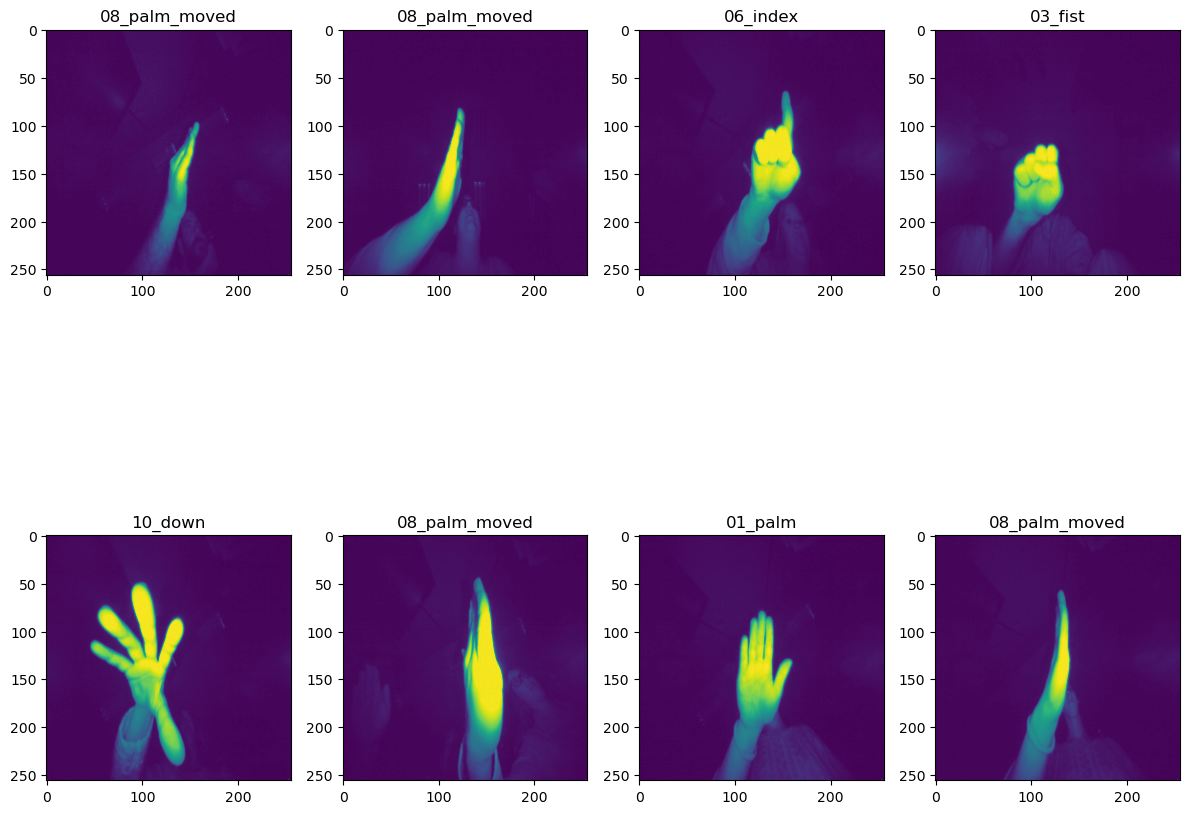

In [7]:
fig,ax=plt.subplots(2,4)
fig.set_size_inches(12,12)
for i in range(2):
    for j in range (4):
      l=rn.randint(0,len(y_data))
      ax[i,j].imshow(x_data[l])
      ax[i,j].set_title(reverselookup[y_data[l,0]])

plt.tight_layout()

In [7]:
y_data=to_categorical(y_data)
x_data = x_data.reshape((datacount, IMG_SIZE, IMG_SIZE, 1))
x_data = x_data/255

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.25,random_state=42)

Building CNN Architecture

In [9]:
cnnmodel = Sequential()

cnnmodel.add(Conv2D(32, kernel_size =(5,5),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,1)))
cnnmodel.add(MaxPooling2D(pool_size=(2,2),padding = "same"))


cnnmodel.add(Conv2D(64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


cnnmodel.add(Conv2D(96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

cnnmodel.add(Conv2D(128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

cnnmodel.add(Flatten())

cnnmodel.add(Dense(128,activation = "relu",kernel_regularizer=regularizers.L1(0.01)))

cnnmodel.add(Dropout(0.2))
cnnmodel.add(Dense(10, activation = "softmax"))

In [10]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)

reduce_m = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1,
    mode='auto'
)

callbacks = [early_stopping, reduce_m]

In [11]:
cnnmodel.compile(optimizer = "Adam",loss = "categorical_crossentropy",metrics = "accuracy")

In [12]:
cnnmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 96)        0

In [13]:
history = cnnmodel.fit(x_train,y_train,epochs = 10 ,validation_data =(x_test,y_test), batch_size = 112, callbacks = callbacks)

Epoch 1/10
134/134 [==============================] - 983s 7s/step - loss: 22.8032 - accuracy: 0.6366 - val_loss: 6.2540 - val_accuracy: 0.9636 - lr: 0.0010
Epoch 2/10
134/134 [==============================] - 899s 7s/step - loss: 6.2233 - accuracy: 0.9349 - val_loss: 5.9992 - val_accuracy: 0.9792 - lr: 0.0010
Epoch 3/10
134/134 [==============================] - 890s 7s/step - loss: 6.0839 - accuracy: 0.9567 - val_loss: 6.2296 - val_accuracy: 0.9510 - lr: 0.0010
Epoch 4/10
134/134 [==============================] - 892s 7s/step - loss: 6.0407 - accuracy: 0.9619 - val_loss: 5.8289 - val_accuracy: 0.9910 - lr: 0.0010
Epoch 5/10
134/134 [==============================] - 896s 7s/step - loss: 6.0000 - accuracy: 0.9644 - val_loss: 6.0333 - val_accuracy: 0.9936 - lr: 0.0010
Epoch 6/10
134/134 [==============================] - 879s 7s/step - loss: 5.9941 - accuracy: 0.9674 - val_loss: 5.8353 - val_accuracy: 0.9900 - lr: 0.0010
Epoch 7/10
134/134 [==============================] - 868s 6s/s

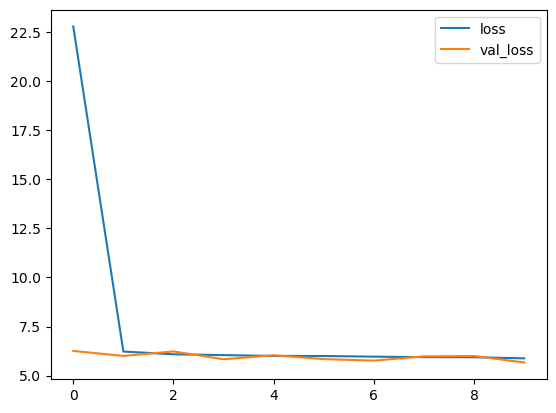

In [14]:
plt.plot(history.history["loss"],label = "loss")
plt.plot(history.history["val_loss"],label = "val_loss")
plt.legend()
plt.show()

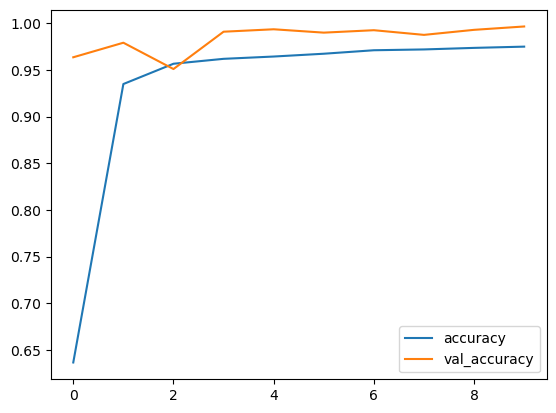

In [15]:
plt.plot(history.history["accuracy"],label = "accuracy")
plt.plot(history.history["val_accuracy"],label = "val_accuracy")
plt.legend()
plt.show()

In [16]:
[loss, acc] = cnnmodel.evaluate(x_test,y_test,verbose=1)
print("Accuracy: " + str(acc))

157/157 [==============================] - 77s 491ms/step - loss: 5.6650 - accuracy: 0.9966
Accuracy: 0.9965999722480774


In [23]:
!pip install h5py

In [24]:
from tensorflow.keras.models import save_model
cnnmodel.save("hand_gesture_recognition.h5py")

INFO:tensorflow:Assets written to: hand_gesture_recognition.h5py\assets


INFO:tensorflow:Assets written to: hand_gesture_recognition.h5py\assets


### Transfer learning


In [31]:
#!pip uninstall h5py

^C


In [32]:
#!pip install h5py

In [33]:
#import h5py

ImportError: DLL load failed while importing defs: The specified procedure could not be found.

In [34]:
'''from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load the VGG16 model with ImageNet weights
model = VGG16(weights='imagenet', include_top=True)'''

ImportError: `load_weights` requires h5py package when loading weights from HDF5. Try installing h5py.

In [35]:
#vgg_model = Sequential()


In [37]:
'''conv_layers = VGG16(
    include_top = False,
    weights = "imagenet",
    input_shape = (IMG_SIZE,IMG_SIZE,3),
    classifier_activation = "softmax"
)'''

ImportError: `load_weights` requires h5py package when loading weights from HDF5. Try installing h5py.

In [38]:
#conv_layers.summary()

NameError: name 'conv_layers' is not defined

In [39]:
'''vgg_model.add(conv_layers)

vgg_model.add(Flatten())

vgg_model.add(Dense(64,activation = "relu",kernel_regularizer=regularizers.L1(0.01)))
vgg_model.add(Dense(96,activation = "relu",kernel_regularizer=regularizers.L1(0.01)))
vgg_model.add(Dense(128,activation = "relu",kernel_regularizer=regularizers.L1(0.01)))

vgg_model.add(Dense(10,activation = "softmax"))'''

NameError: name 'conv_layers' is not defined

In [40]:
#conv_layers.trainable = False

NameError: name 'conv_layers' is not defined

In [41]:
#vgg_model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
#vgg_model.compile(optimizer = "Adam",loss = "categorical_crossentropy",metrics = "accuracy")

In [42]:
#history = vgg_model.fit(x_train,y_train,epochs = 10,validation_data = (x_test,y_test),batch_size= 112, callbacks = callbacks)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

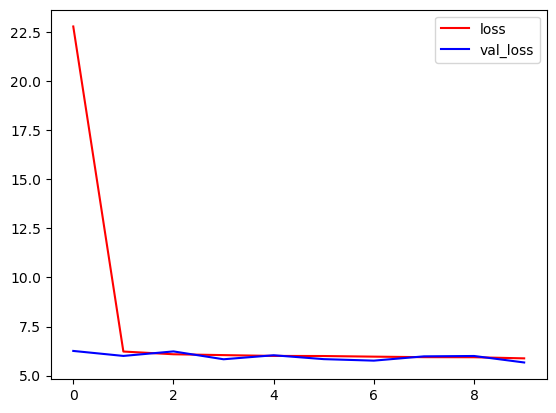

In [43]:
'''plt.plot(history.history["loss"],color = "red",label = "loss")
plt.plot(history.history["val_loss"],color = "blue",label = "val_loss")
plt.legend()
plt.show()'''

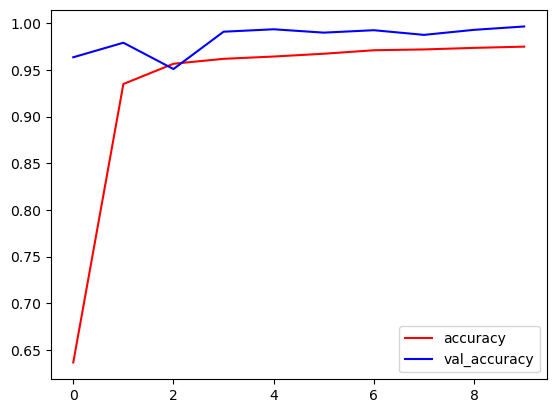

In [44]:
'''plt.plot(history.history["accuracy"],color = "red",label = "accuracy")
plt.plot(history.history["val_accuracy"],color = "blue",label = "val_accuracy")
plt.legend()
plt.show()'''

In [ ]:
'''

from tensorflow.keras.applications.vgg16 import VGG16


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the VGG16 base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(, activation='softmax')  # Adjust num_classes to match your dataset

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Data augmentation (optional)
# You can use data augmentation techniques to improve model generalization.

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

# Save the model if needed
# model.save('hand_gesture_vgg16.h5')
'''